## Propeller Design

The goal of this notebook is to explore basic design of propellers using the blade element theory.

This approach treats a propellers as a set of airfoil sections, and calculates the lift and drag forces for each section.

These forces are then summed up and translated to thrust and torque.

#### What properties can you change about a prop?

- Number of blades
- Radius
- Airfoil
- Twist angle
- Chord Length
- Hub diameter

## Setup

In [1]:
# Set base directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prop_designer.analysis.bet import calculate_bet
from prop_designer.types.prop import create_prop

In [3]:
# Read the xfoil results retrieved from airfoiltools.com for 50k reynolds number
df_airfoil = pd.read_csv('../prop_designer/constant/xf-e423-il-50000.csv')
df_airfoil

,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr
0,-14.50,-0.2148,0.19351,0.18675,-0.0396,1.0000,0.0754
1,-14.25,-0.2225,0.19413,0.18750,-0.0381,1.0000,0.0758
2,-14.00,-0.2321,0.19512,0.18859,-0.0365,1.0000,0.0760
3,-13.50,-0.2443,0.19309,0.18679,-0.0326,1.0000,0.0766
4,-13.25,-0.2467,0.19071,0.18449,-0.0304,1.0000,0.0773
...,...,...,...,...,...,...,...
107,13.25,1.0882,0.19647,0.18704,-0.1792,0.5095,1.0000
108,13.50,1.0801,0.19621,0.18684,-0.1798,0.4999,1.0000
109,13.75,1.1106,0.20187,0.19256,-0.1805,0.4937,1.0000
110,14.00,1.0984,0.20147,0.19220,-0.1815,0.4854,1.0000


## Create Prop

In [ ]:
prop = create_prop(num_blades=2, 
                   diameter=0.25, # 25 cm
                   hub_radius=0.03, # 3cm
                   num_sections=50,
                   chord_range=(0.06, 0.04), # 6cm to 3cm
                   twist_range=(25, 60), # 45 degree to 15 degree
                   cl_alpha=(df_airfoil['Alpha'], df_airfoil['Cl']),
                   cd_alpha=(df_airfoil['Alpha'], df_airfoil['Cd']),
                   )

Propeller(num_blades=2, diameter=0.25, hub_radius=0.03, sections=[BladeSection(radius=0.03, chord=0.06, twist=25.0, cl_alpha=([-14.5, -14.25, -14.0, -13.5, -13.25, -13.0, -12.75, -12.5, -12.25, -12.0, -11.75, -11.5, -11.25, -11.0, -10.75, -10.5, -10.25, -10.0, -9.75, -9.5, -9.25, -9.0, -8.75, -8.5, -8.25, -8.0, -7.75, -7.5, -7.25, -7.0, -6.75, -6.5, -6.25, -6.0, -5.75, -5.5, -5.25, -5.0, -4.75, -4.5, -4.25, -4.0, -3.75, -3.5, -3.25, -3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25], [-0.2148, -0.2225, -0.2321, -0.2443, -0.2467, -0.2514, -0.2567, -0.262, -0.2672, -0.2722, -0.2771, -0.2821, -0.2729, -0.2629, -0.2579, -0.2281, -0.2111, -0.2001, -

## Calculate Thrust/Torque

In [5]:
RPM = 3000
CRUISE_SPEED = 12
thrust, torque, df = calculate_bet(prop=prop, 
                               rpm=RPM, 
                               free_stream_velocity=CRUISE_SPEED,
                               )
thrust, torque

(np.float64(4.348135557237658), np.float64(0.2783248724488194))

In [6]:
df.head(2)

,radius,r/R,alpha_deg,phi_deg,chord,twist,cl,cd,dL,dD,velocity,thrust,torque
0,0.030000,0.24000,-26.853974,51.853974,0.060000,25.000000,-0.2148,0.19351,-0.004595,0.004139,15.258651,-0.006093,-0.000032
1,0.031939,0.25551,-24.384858,50.099143,0.059592,25.714286,-0.2148,0.19351,-0.004796,0.004320,15.642199,-0.006391,-0.000029


## Plot Prop Stats

Text(0.5, 1.0, 'Propeller twist angle vs radius')

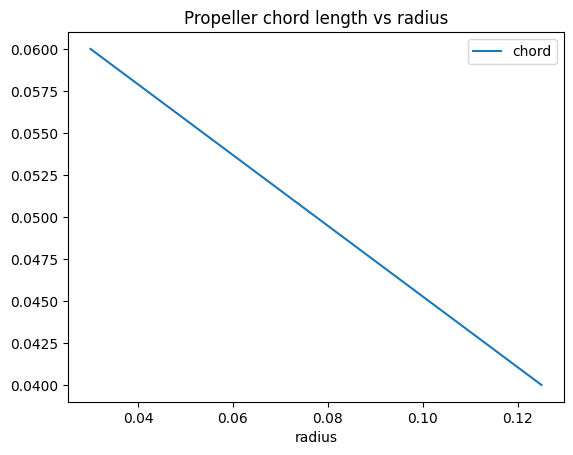

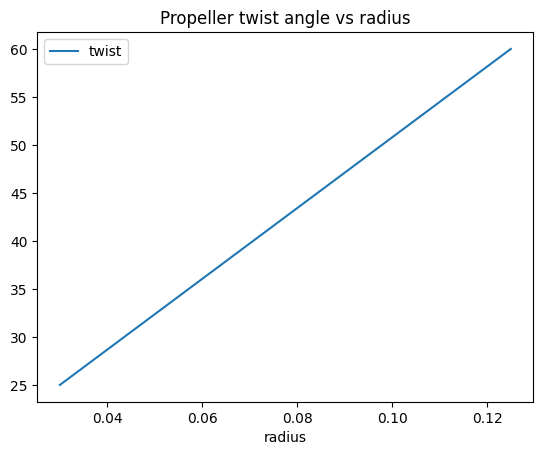

In [7]:
df.plot(x='radius', y=['chord'], legend=['Chord Length'])
plt.title(f"Propeller chord length vs radius")
df.plot(x='radius', y=['twist'], legend=['Twist Angle'])
plt.title(f"Propeller twist angle vs radius")


Text(0.5, 1.0, 'Propeller radius vs element lift')

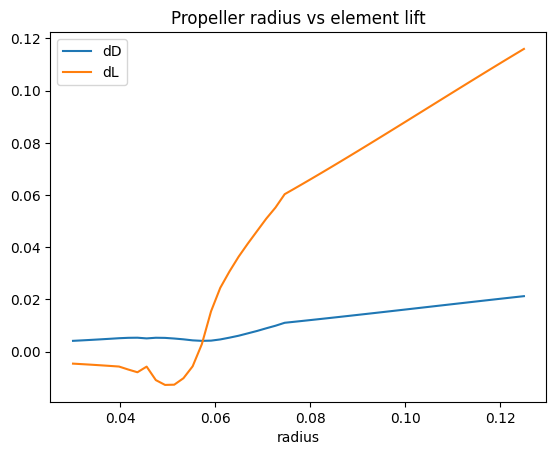

In [8]:
df.plot(x='radius', y=['dD', 'dL'], legend=['Drag force', 'Lift force'])
plt.title(f"Propeller radius vs element lift")
